In [2]:
library(WGCNA)
options(stringsAsFactors = FALSE);

In [4]:
lnames = load(file = "FemaleLiver-01-dataInput.RData");
lnames # same samples, datExpr includes gene info for each sample, datTrait traits info

[1] "datExpr"   "datTraits"

In [6]:
powers = c(c(1:10), seq(from = 12, to=20, by=2))
powers

[1]  1  2  3  4  5  6  7  8  9 10 12 14 16 18 20

In [ ]:
sft = pickSoftThreshold(datExpr, powerVector = powers, verbose = 5)

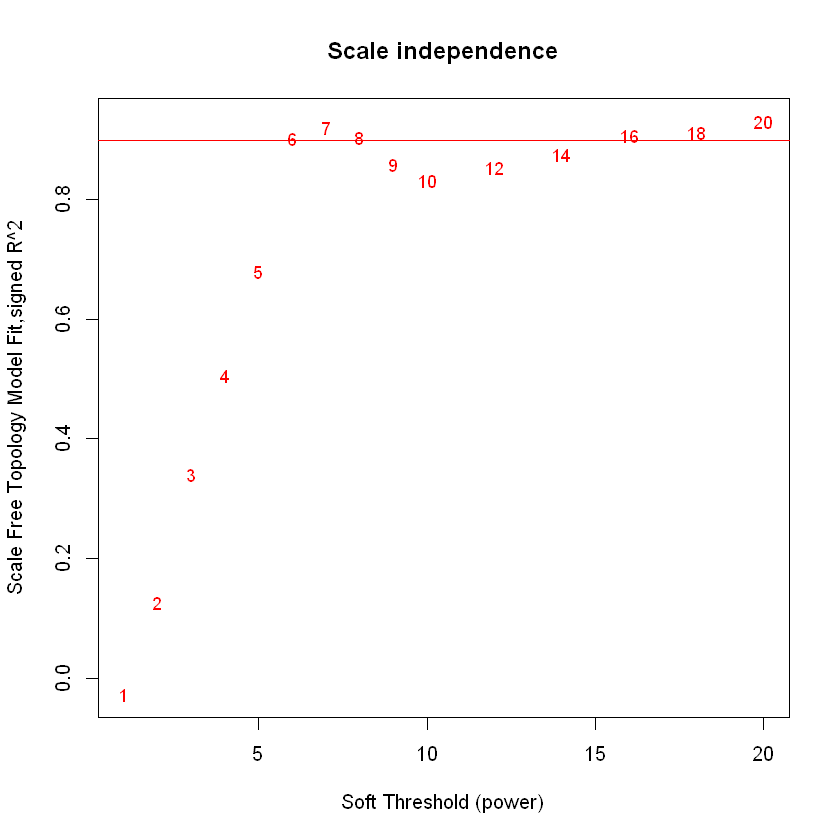

In [23]:
# par(mfrow = c(1,2))
cex1 = 0.9

plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",
     type="n",main = paste("Scale independence")) # type=n plot nothing
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2]
     ,labels=powers,cex=cex1,col="red")

abline(h=0.90,col="red")

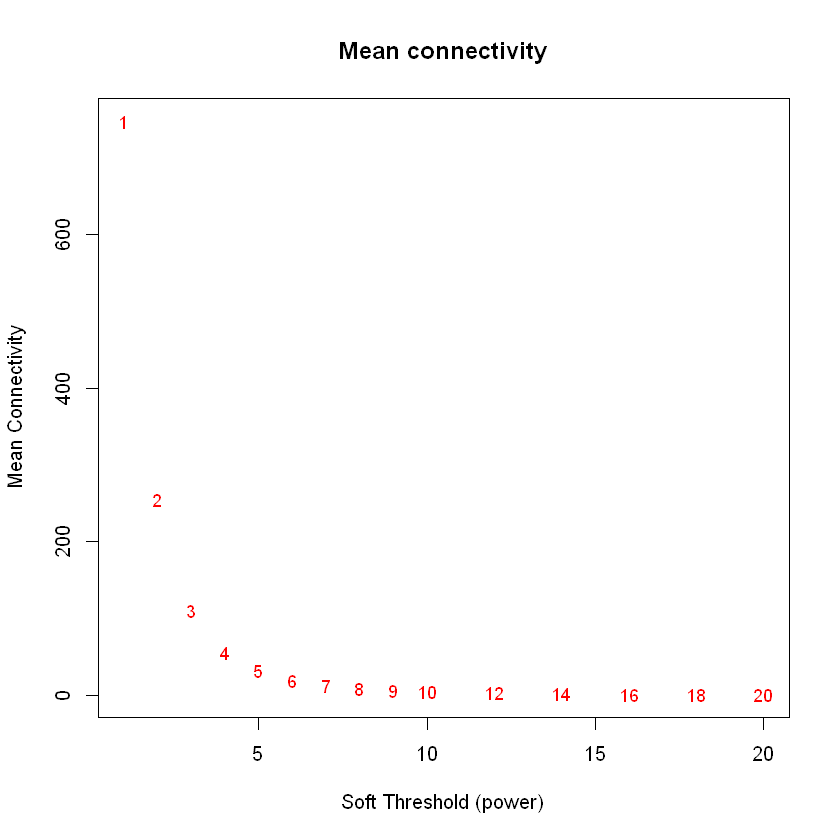

In [25]:
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",ylab="Mean Connectivity",
     type="n",main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

In [26]:
net = blockwiseModules(datExpr, power = 6,TOMType = "unsigned", 
                       minModuleSize = 30,reassignThreshold = 0, 
                       mergeCutHeight = 0.25,numericLabels = TRUE, 
                       pamRespectsDendro = FALSE,saveTOMs = TRUE,
                       saveTOMFileBase = "femaleMouseTOM",verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
Cluster size 3600 broken into 2108 1492 
Cluster size 2108 broken into 1126 982 
Done cluster 1126 
Done cluster 982 
Done cluster 2108 
Done cluster 1492 
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.396405
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file femaleMouseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 1 genes from module 1 because their KME is too low.
     ..removing 1 genes from module 7 because their KME is too low.
     ..removing 1 genes from module 8 because their KME is too low.
     ..removing 1 genes from module 21 because their KME is too low.
 ..merging modules that a

In [32]:
table(net$colors) # table: count the number


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18 
 99 609 460 409 316 312 221 211 157 123 106 100  94  91  77  76  58  47  34 

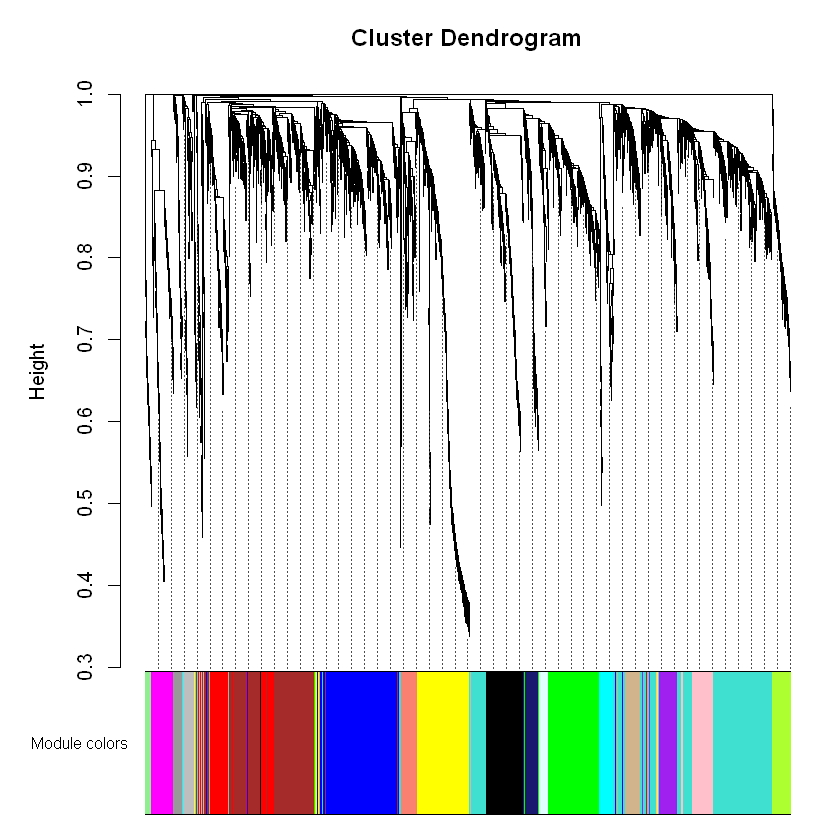

In [39]:
mergedColors = labels2colors(net$colors)
plotDendroAndColors(net$dendrograms[[1]], 
                    mergedColors[net$blockGenes[[1]]],
                    "Module colors",dendroLabels = FALSE, 
                    hang = 0.03,addGuide = TRUE, guideHang = 0.05)

In [41]:
moduleLabels = net$colors
moduleColors = labels2colors(net$colors)
MEs = net$MEs
geneTree = net$dendrograms[[1]]
save(MEs, moduleLabels, moduleColors, geneTree,
     file = "FemaleLiver-02-networkConstruction-auto.RData")